# Extract the toy model fields

### Constant potential

In [1]:
import numpy as np

# hbar * c [GeV * fm]
hbarc = 0.197326 

# Simulation box 
L = 1         
N = 128 
tau_sim = 0.25    
DTS = 8

# Derived parameters
a = L/N
E0 = N / L * hbarc
DT = 1.0 / DTS
maxt = int(tau_sim / a * DTS)
nplus = maxt//DTS

# Glasma fields
su_group = 'su3'
uv = 10.0
ir = 0.2
g2mu = 1.5


g = 2.0          		
mu = g2mu / g**2

ns = 50      

nevents = 1

In [2]:
import os

# Comment this, I need it for JYU GPUs to choose a specific GPU to run on
# os.environ["CUDA_VISIBLE_DEVICES"]="4"

os.environ["MY_NUMBA_TARGET"] = "numba"
os.environ["PRECISION"] = "double"
os.environ["GAUGE_GROUP"] = su_group

# Import relevant modules
import sys
sys.path.append('..')

# Glasma modules
import curraun.core as core
import curraun.mv as mv
import curraun.initial as initial
initial.DEBUG = False

import curraun.su as su
from curraun.numba_target import use_cuda
if use_cuda:
    from numba import cuda

# Qhat module
import curraun.qhat as qhat

import pickle
from tqdm import tqdm

Using Numba
Using SU(3)
Using double precision


/home2/carlos.lamas/condacurraun/lib/python3.10/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
tsteps = int(tau_sim/(L/N))

up = np.zeros((tsteps, N, N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)
Ay = np.zeros((tsteps, N, N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)
Az = np.zeros((tsteps, N, N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)

Asq = np.zeros((tsteps, N, N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)

for xplus in range (tsteps):
    for y in range(N):
        for z in range(N):
            A = np.full(8,-1j)
            Ay[xplus, y, z] = su.get_algebra_element(A)
            up[xplus, y, z] = su.unit()
            
            Asq[xplus, y, z]= su.mul(Ay[xplus, y, z], Ay[xplus, y, z])

/lustre/HQCD/carlos.lamas/curraun/SimpleTest/../curraun/su3.py:80: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../curraun/su3.py", line 398:
@myjit
def mul_s(g0, f):
^

  ms0 = mul_s(s1, algebra_factors[0])
/lustre/HQCD/carlos.lamas/curraun/SimpleTest/../curraun/su3.py:90: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../curraun/su3.py", line 369:
@myjit
def add(g0, g1):
^

  b0 = add(ms0, ms1)
/home2/carlos.lamas/condacurraun/lib/python3.10/site-packages/numba/core/typed_passes.py:329: NumbaPerformanceWarning: 
The keyw

In [4]:
A_test = Ay[0, 0, 0].reshape(3, 3)
print(A_test)

[[ 0.78867513-0.j   0.5       -0.5j  0.5       -0.5j]
 [ 0.5       +0.5j -0.21132487+0.j   0.5       -0.5j]
 [ 0.5       +0.5j  0.5       +0.5j -0.57735027+0.j ]]


In [5]:
Asq_test = Asq[0, 0, 0].reshape(3, 3)
print(Asq_test)

[[1.62200847+0.j         0.78867513-0.28867513j 0.10566243-0.60566243j]
 [0.78867513+0.28867513j 1.0446582 +0.j         0.10566243+0.39433757j]
 [0.10566243+0.60566243j 0.10566243-0.39433757j 1.33333333+0.j        ]]


In [6]:
print(np.trace(Asq_test)/3)

(1.3333333333333333+0j)


In [7]:
# Go up one level from 'notebooks' to parent, then into 'simulations/tuomas_guess'
save_dir = os.path.join('..', 'SimpleTest', 'ConstantTest')
os.makedirs(save_dir, exist_ok=True)

np.save(os.path.join(save_dir, 'up.npy'), up)
np.save(os.path.join(save_dir, 'Ay.npy'), Ay)
np.save(os.path.join(save_dir, 'Az.npy'), Az)

### Toy model

In [1]:
import numpy as np

# hbar * c [GeV * fm]
hbarc = 0.197326 

# Simulation box 
L = 1         
N = 128 
tau_sim = 0.25    
DTS = 8

# Derived parameters
a = L/N
E0 = N / L * hbarc
DT = 1.0 / DTS
maxt = int(tau_sim / a * DTS)
nplus = maxt//DTS

# Glasma fields
su_group = 'su3'
uv = 10.0
ir = 0.2
g2mu = 1.5


g = 2.0          		
mu = g2mu / g**2

ns = 50      

nevents = 1

In [2]:
import os

# Comment this, I need it for JYU GPUs to choose a specific GPU to run on
# os.environ["CUDA_VISIBLE_DEVICES"]="4"

os.environ["MY_NUMBA_TARGET"] = "numba"
os.environ["PRECISION"] = "double"
os.environ["GAUGE_GROUP"] = su_group

# Import relevant modules
import sys
sys.path.append('..')

# Glasma modules
import curraun.core as core
import curraun.mv as mv
import curraun.initial as initial
initial.DEBUG = False

import curraun.su as su
from curraun.numba_target import use_cuda
if use_cuda:
    from numba import cuda

# Qhat module
import curraun.qhat as qhat

import pickle
from tqdm import tqdm

Using Numba
Using SU(3)
Using double precision


/home2/carlos.lamas/condacurraun/lib/python3.10/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
tsteps = int(tau_sim/(L/N))

up = np.zeros((tsteps, N*N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)
Ay = np.zeros((tsteps, N*N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)
Az = np.zeros((tsteps, N*N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)

for xplus in range (tsteps):
    for yi in range(N*N):
        
        # Extract the indices
        y = yi // N; z = yi % N
        
        # Compute the gauge field
        if y < N//2:
            Ax = np.full(8, -y*(a/hbarc)**2)
            
        else:
            Ax = np.full(8, -(N-y)*(a/hbarc)**2)
            
        Afact = su.get_algebra_element(Ax)
        
        # Compute the gauge link
        up[xplus, yi] = su.mexp(Afact)
        
        # Compute transverse field
        Ay_fact = np.full(8, -1j/(xplus*a/hbarc + 1))
        Ay[xplus, yi] = su.get_algebra_element(Ay_fact)

Ay -= Ay[0]
Az -= Az[0]


/lustre/HQCD/carlos.lamas/curraun/SimpleTest/../curraun/su3.py:80: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../curraun/su3.py", line 398:
@myjit
def mul_s(g0, f):
^

  ms0 = mul_s(s1, algebra_factors[0])
/lustre/HQCD/carlos.lamas/curraun/SimpleTest/../curraun/su3.py:90: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../curraun/su3.py", line 369:
@myjit
def add(g0, g1):
^

  b0 = add(ms0, ms1)
/lustre/HQCD/carlos.lamas/curraun/SimpleTest/../curraun/su3.py:99: NumbaPerformanceWarning: 
The keyword argument 'parallel=True

In [4]:
# Go up one level from 'notebooks' to parent, then into 'simulations/tuomas_guess'
save_dir = os.path.join('..', 'SimpleTest', 'full_toy_model')
os.makedirs(save_dir, exist_ok=True)

np.save(os.path.join(save_dir, 'up.npy'), up)
np.save(os.path.join(save_dir, 'Ay.npy'), Ay)
np.save(os.path.join(save_dir, 'Az.npy'), Az)

We plot the fields

In [5]:
# We extract the color components
up_r = up.reshape(tsteps, N, N, su.GROUP_ELEMENTS)
Ap_comp = np.apply_along_axis(su.get_algebra_factors_from_group_element_approximate, 3, up_r)

/lustre/HQCD/carlos.lamas/curraun/SimpleTest/../curraun/su3.py:525: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../curraun/su3.py", line 119:
@myjit
def mul(a, b):
^

  r1 = tr(mul(s1, g)).imag
/lustre/HQCD/carlos.lamas/curraun/SimpleTest/../curraun/su3.py:525: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../curraun/su3.py", line 457:
@myjit
def tr(a):
^

  r1 = tr(mul(s1, g)).imag
/home2/carlos.lamas/condacurraun/lib/python3.10/site-packages/numba/core/typed_passes.py:329: NumbaPerformanceWarning: 
The keyword argument

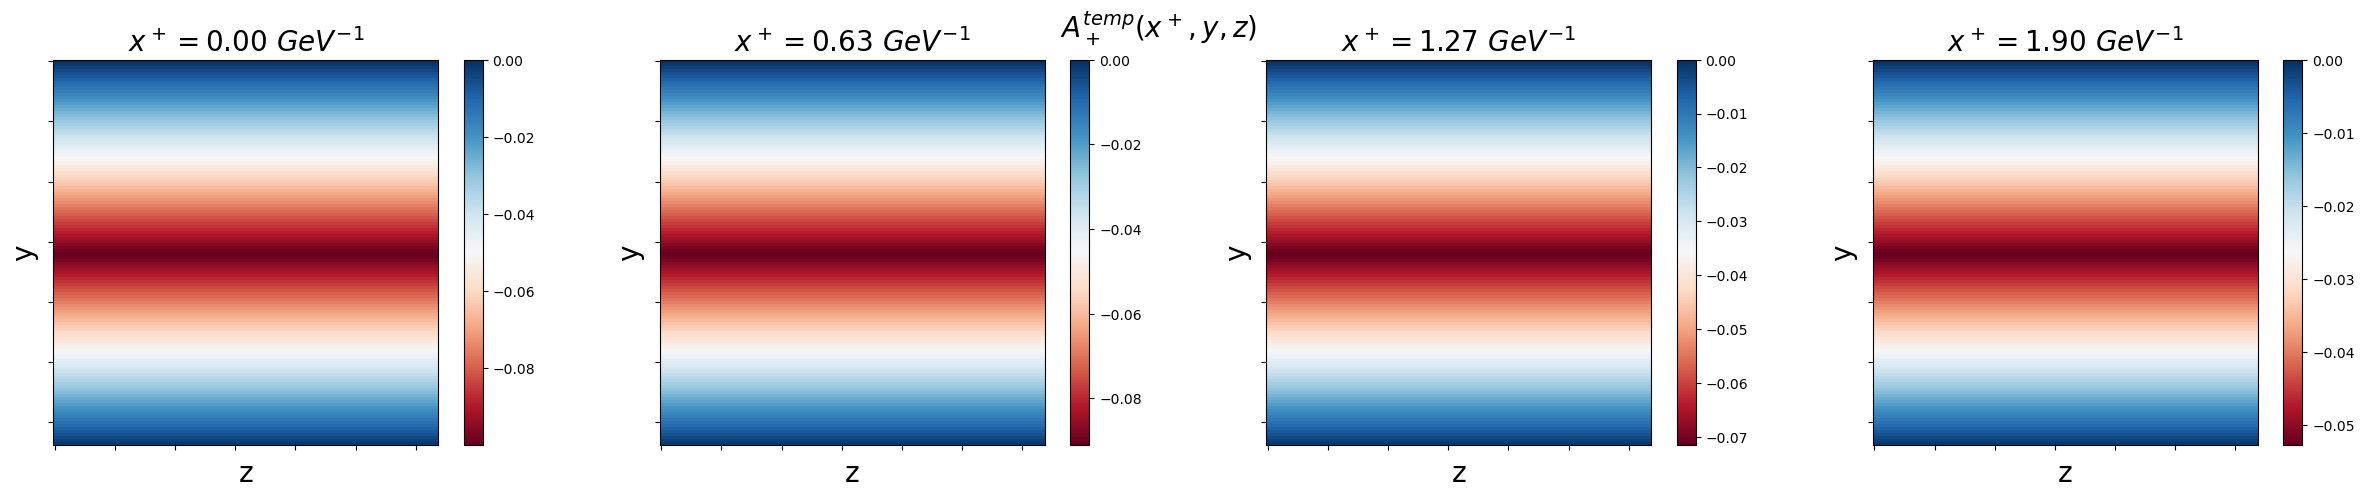

In [6]:
# We plot the temporal gauge results
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, nplus//8, figsize=(30,5))
fig.suptitle(r'$A_+^{temp}(x^+, y, z)$', fontsize=20)

for t in range(nplus//8): 
    xplus = 8*t
    
    plot1 = axs[t].imshow(Ap_comp[xplus, :, :, 0].real, cmap='RdBu') 
    cbar = plt.colorbar(plot1, ax = axs[t])
    
    axs[t].set_xticklabels([]); axs[t].set_yticklabels([])
    axs[t].set_ylabel('y', fontsize=20); axs[t].set_xlabel('z', fontsize=20)
    axs[t].set_title(r'$x^+ = %.2f\ GeV^{-1}$' %(2*a*xplus/hbarc), fontsize=20)
    
# plt.savefig('zoom arround z=0')

### Include canonic momentum broadening

Let as now consider $A_y^a = t$ and $A_x^a = y$

In [1]:
import numpy as np

# hbar * c [GeV * fm]
hbarc = 0.197326 

# Simulation box 
L = 1         
N = 128 
tau_sim = 0.25    
DTS = 8

# Derived parameters
a = L/N
E0 = N / L * hbarc
DT = 1.0 / DTS
maxt = int(tau_sim / a * DTS)
nplus = maxt//DTS

# Glasma fields
su_group = 'su3'
uv = 10.0
ir = 0.2
g2mu = 1.5


g = 2.0          		
mu = g2mu / g**2

ns = 50      

nevents = 1

In [2]:
import os

# Comment this, I need it for JYU GPUs to choose a specific GPU to run on
# os.environ["CUDA_VISIBLE_DEVICES"]="4"

os.environ["MY_NUMBA_TARGET"] = "numba"
os.environ["PRECISION"] = "double"
os.environ["GAUGE_GROUP"] = su_group

# Import relevant modules
import sys
sys.path.append('..')

# Glasma modules
import curraun.core as core
import curraun.mv as mv
import curraun.initial as initial
initial.DEBUG = False

import curraun.su as su
from curraun.numba_target import use_cuda
if use_cuda:
    from numba import cuda

# Qhat module
import curraun.qhat as qhat

import pickle
from tqdm import tqdm

Using Numba
Using SU(3)
Using double precision


/home2/carlos.lamas/condacurraun/lib/python3.10/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
tsteps = int(tau_sim/(L/N))

up = np.zeros((tsteps, N, N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)
Ax = np.zeros((tsteps, N, N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)
Ay = np.zeros((tsteps, N, N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)
Az = np.zeros((tsteps, N, N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)

for xplus in range (tsteps):
    for y in range(N):
        for z in range(N):
            t_fact = np.full(8,-1j*(xplus*a/hbarc+2))
            if y < N//2:
                y_fact = np.full(8, -1j*y*a/ hbarc)
            else:
                y_fact = np.full(8, 1j*(N-y)*a/ hbarc)
            
            Ay[xplus, y, z] = su.get_algebra_element(t_fact)
            Ax[xplus, y, z] = su.get_algebra_element(y_fact)
            
            Ax_fact = su.mul_s(Ax[xplus, y, z], -1j*a/hbarc)
            up[xplus, y, z] = su.mexp(Ax_fact)

/lustre/HQCD/carlos.lamas/curraun/SimpleTest/../curraun/su3.py:80: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../curraun/su3.py", line 398:
@myjit
def mul_s(g0, f):
^

  ms0 = mul_s(s1, algebra_factors[0])
/lustre/HQCD/carlos.lamas/curraun/SimpleTest/../curraun/su3.py:90: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../curraun/su3.py", line 369:
@myjit
def add(g0, g1):
^

  b0 = add(ms0, ms1)
/home2/carlos.lamas/condacurraun/lib/python3.10/site-packages/numba/core/typed_passes.py:329: NumbaPerformanceWarning: 
The keyw

In [4]:
# Go up one level from 'notebooks' to parent, then into 'simulations/tuomas_guess'
save_dir = os.path.join('..', 'SimpleTest', 'include_canonic+cte')
os.makedirs(save_dir, exist_ok=True)

np.save(os.path.join(save_dir, 'up.npy'), up.reshape(tsteps, N*N, su.GROUP_ELEMENTS))
np.save(os.path.join(save_dir, 'Ay.npy'), Ay.reshape(tsteps, N*N, su.GROUP_ELEMENTS))
np.save(os.path.join(save_dir, 'Az.npy'), Az.reshape(tsteps, N*N, su.GROUP_ELEMENTS))

### Include color rotation

Let us consider now that $A_x = y+1$ and $A_y = t$

In [24]:
import numpy as np

# hbar * c [GeV * fm]
hbarc = 0.197326 

# Simulation box 
L = 1         
N = 128 
tau_sim = 0.25    
DTS = 8

# Derived parameters
a = L/N
E0 = N / L * hbarc
DT = 1.0 / DTS
maxt = int(tau_sim / a * DTS)
nplus = maxt//DTS

# Glasma fields
su_group = 'su3'
uv = 10.0
ir = 0.2
g2mu = 1.5


g = 2.0          		
mu = g2mu / g**2

ns = 50      

nevents = 1

In [25]:
import os

# Comment this, I need it for JYU GPUs to choose a specific GPU to run on
# os.environ["CUDA_VISIBLE_DEVICES"]="4"

os.environ["MY_NUMBA_TARGET"] = "numba"
os.environ["PRECISION"] = "double"
os.environ["GAUGE_GROUP"] = su_group

# Import relevant modules
import sys
sys.path.append('..')

# Glasma modules
import curraun.core as core
import curraun.mv as mv
import curraun.initial as initial
initial.DEBUG = False

import curraun.su as su
from curraun.numba_target import use_cuda
if use_cuda:
    from numba import cuda

# Qhat module
import curraun.qhat as qhat

import pickle
from tqdm import tqdm

Simulate the fields

In [26]:
tsteps = int(tau_sim/(L/N))

up = np.zeros((tsteps, N, N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)
Ax = np.zeros((tsteps, N, N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)
Ay = np.zeros((tsteps, N, N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)
Az = np.zeros((tsteps, N, N, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)

for xplus in range (tsteps):
    for y in range(N):
        for z in range(N):
            t_fact = np.full(8,-1j*xplus*a/hbarc)
            rot_fact = np.full(8, -1j)
            
            Ay[xplus, y, z] = su.get_algebra_element(t_fact)
            Ax[xplus, y, z] = su.get_algebra_element(rot_fact)
            
            Ax_fact = su.mul_s(Ax[xplus, y, z], -1j*a/hbarc)
            up[xplus, y, z] = su.mexp(Ax_fact)

In [27]:
# Go up one level from 'notebooks' to parent, then into 'simulations/tuomas_guess'
save_dir = os.path.join('..', 'SimpleTest', 'include_rotation')
os.makedirs(save_dir, exist_ok=True)

np.save(os.path.join(save_dir, 'up.npy'), up.reshape(tsteps, N*N, su.GROUP_ELEMENTS))
np.save(os.path.join(save_dir, 'Ay.npy'), Ay.reshape(tsteps, N*N, su.GROUP_ELEMENTS))
np.save(os.path.join(save_dir, 'Az.npy'), Az.reshape(tsteps, N*N, su.GROUP_ELEMENTS))

Obtain the Lorentz force

In [ ]:
fy = np.zeros((tsteps, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)

for t in range (tsteps):
    w_fact = su.mul_s(Ax[t, 0, 0], -1j*a/hbarc*t)
    w = su.mexp(w_fact)
            
    aux1 = su.mul(rot_fact, rot_fact)
    aux2 = su.mul(aux1, w)
    fy[t] = su.mul(aux2, su.dagger(w))

Integrate the Lorentz force

In [29]:
Fy = np.zeros((tsteps+1, su.GROUP_ELEMENTS), dtype=su.GROUP_TYPE)
for t in range (tsteps):
    Fy[t+1] = Fy[t] + su.mul_s(fy[t], a)

Get momentum broadening

In [42]:
p2 = np.zeros((tsteps+1), dtype=su.GROUP_TYPE)
t_array = np.zeros((tsteps+1), dtype=np.float64)

for t in range (tsteps+1):
    
    aux = su.mul(Fy[t], Fy[t])  
    p2[t] = 1/3*su.tr(aux)
    
    t_array[t] = t * a / hbarc
            
    

In [43]:
# We save to file

save_dir = os.path.join('..', 'SimpleTest', 'include_rotation')
os.makedirs(save_dir, exist_ok=True)

np.savetxt(os.path.join(save_dir, 't_class.txt'), t_array.real)
np.savetxt(os.path.join(save_dir, 'p2_class.txt'), p2.real)